# Simple Linear Regression

#### In this lecture, our aim is to implement simples regression on a dataset. We will split the data into test and train sets and then perform the tesing on our test data.

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import pylab as pl
%matplotlib inline

In [63]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-10-25 17:45:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  19.6KB/s    in 3.6s    

2019-10-25 17:45:49 (19.6 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### Understanding the data

In [64]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [65]:
# This will give us an exploration of our data.
df.describe() 

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [66]:
# Now, as we described the data, there are some features that are of importance to us and there are some features which
# are of no importance to us.
arr = ['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']
cdf = df[arr]
cdf.head(10)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244
5,6,3.5,10.0,230
6,6,3.5,10.1,232
7,6,3.7,11.1,255
8,6,3.7,11.6,267
9,4,2.4,9.2,212


[]

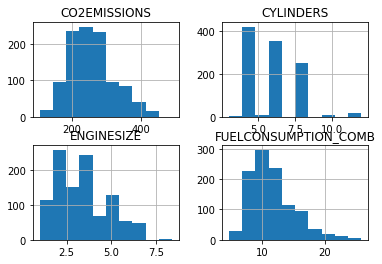

In [67]:
viz = cdf[arr]
viz.hist() 
plt.plot()

#The above will give us the histogram, telling the number of values in for each value. The below histograms give us a good enough visual 
#representation as to which valkue occurs the most, or most of the cars have emissions in which range of that particular param.

### Now, to check how linear the relation is lets plot each of the parameter with the Co2 emission.

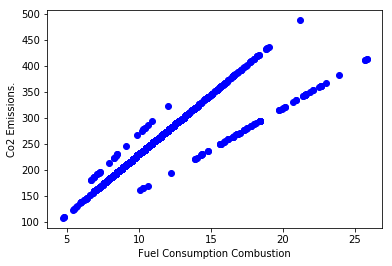

In [68]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Fuel Consumption Combustion')
plt.ylabel('Co2 Emissions.')
plt.show()

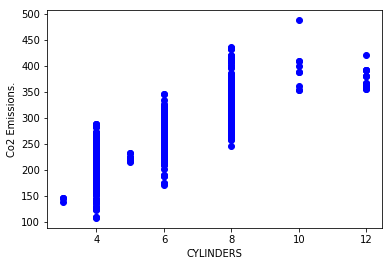

In [69]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('Co2 Emissions.')
plt.show()

(0.8741543683958123, 0.0)


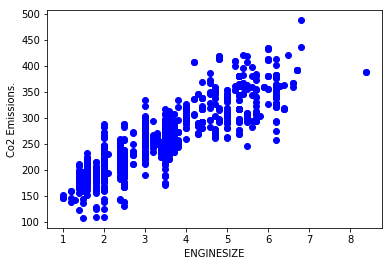

In [79]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('Co2 Emissions.')
x = scipy.stats.pearsonr(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
print(x)
plt.show()

 ## Splitting the data into training and testing sets.

In [56]:
# To obtain high out of sample accuracy, we will split the data into train and test sets, so that, the training set 
# will be the one we will use to train the model and the test set will be the one we will use to test the model.
# So, this will give us a true or fairly good out of sample accuracy.

In [71]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# The above way we get our train and test data's.
train.describe()
test.describe()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,216.000000,216.000000,216.000000,216.000000
mean,5.768519,3.344444,11.521759,255.805556
std,1.822885,1.433086,3.181390,61.370693
min,3.000000,1.000000,4.800000,110.000000
25%,4.000000,2.000000,9.375000,214.000000
50%,6.000000,3.300000,10.900000,250.000000
75%,8.000000,4.200000,13.125000,292.000000
max,12.000000,6.800000,22.600000,437.000000


## Applying the simple linear model

### Linear regression fits a linear model with coefficients to minimize the residual sum of squares between the independent x and the dependent y


[]

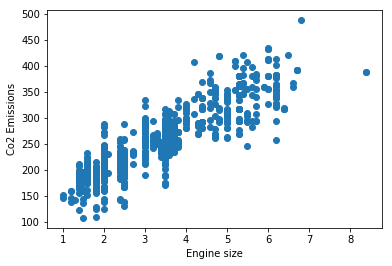

In [72]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.ylabel('Co2 Emissions')
plt.plot()

In [73]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])#This basically converts things to numpy arrays.
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#Now, we call the fit method to fit the linear regression algo on the data.
regr.fit(train_x,train_y)
print("Coefficient: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Coefficient:  [[39.75876388]]
Intercept:  [123.27269634]


### Now, its important that we see the outputs.

Text(0, 0.5, 'Co2 Emisssions')

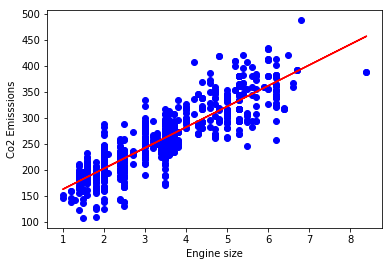

In [74]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel('Engine size')
plt.ylabel('Co2 Emisssions')

## Evaluating the model

In [75]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) #This is the Actual Co2 emissions of the test data
test_y_hat = regr.predict(test_x) # THis is the predicted Co2 emissions of the test data.
 
# Printing the mean absolute error.
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_hat-test_y)))

#Prinitng the mean square error
print("Mean Squared error: %.2f" % np.mean((test_y_hat-test_y)*2))

#Printing the R2 score, given directly. 1- RSE (Relative squred error) = sum(predicted-actual)*2/sum(predicted-mean)*2
print("R2-Score: %.2f" % r2_score(test_y_hat,test_y))

# The higher the value of the R2 score is the better is the model.

Mean Absolute Error: 24.38
Mean Squared error: 0.88
R2-Score: 0.69
